In [1]:
import os
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig

In [2]:
VRP_KEYS = ["ORTEC-n242-k12.vrp", "ORTEC-n323-k21.vrp", "ORTEC-n405-k18.vrp", "ORTEC-n455-k41.vrp", "ORTEC-n510-k23.vrp", "ORTEC-n701-k64.vrp", "Loggi-n401-k23.vrp", "Loggi-n501-k24.vrp", "Loggi-n601-k19.vrp", "Loggi-n601-k42.vrp", "Loggi-n901-k42.vrp", "Loggi-n1001-k31.vrp"]

In [3]:
print("IRL_HGS2 scores:")
irl_hgs_2_df = load_all_scores("logs/dataset_train_data_dimacs_HGS_0.1", range(1, 4), VRP_KEYS)
irl_hgs_2_best_score = irl_hgs_2_df.applymap(lambda x: min(x))
irl_hgs_2_overall = irl_hgs_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_hgs_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_hgs_2_overall.T.round(2)

IRL_HGS2 scores:


,Min,Max,Mean,Std.
ORTEC-n242-k12.vrp,124022.0,124114.0,124080.33,41.41
ORTEC-n323-k21.vrp,215854.0,216786.0,216170.00,435.63
ORTEC-n405-k18.vrp,201162.0,202506.0,201944.33,570.44
ORTEC-n455-k41.vrp,292776.0,296576.0,294106.33,1748.06
ORTEC-n510-k23.vrp,185559.0,186339.0,186021.00,334.32
ORTEC-n701-k64.vrp,447370.0,449872.0,448996.33,1151.12
Loggi-n401-k23.vrp,338711.0,344956.0,342514.00,2725.10
Loggi-n501-k24.vrp,178268.0,180157.0,179391.67,811.74
Loggi-n601-k19.vrp,113467.0,113763.0,113624.33,121.56
Loggi-n601-k42.vrp,349782.0,353009.0,351199.67,1346.21


In [4]:
print("IRL_VNS2 scores:")
irl_vns_2_df = load_all_scores("logs/dataset_train_data_dimacs_VNS_0.1", range(1, 4), VRP_KEYS)
irl_vns_2_best_score = irl_vns_2_df.applymap(lambda x: min(x))
irl_vns_2_overall = irl_vns_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_vns_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_vns_2_overall.T.round(2)

IRL_VNS2 scores:


,Min,Max,Mean,Std.
ORTEC-n242-k12.vrp,126472.0,127925.0,127336.33,624.39
ORTEC-n323-k21.vrp,218381.0,219576.0,218926.00,493.47
ORTEC-n405-k18.vrp,204703.0,207047.0,206018.33,978.17
ORTEC-n455-k41.vrp,297524.0,299916.0,298460.67,1043.13
ORTEC-n510-k23.vrp,187999.0,192199.0,190693.67,1909.78
ORTEC-n701-k64.vrp,455959.0,456790.0,456389.00,339.87
Loggi-n401-k23.vrp,343897.0,346123.0,345342.33,1023.10
Loggi-n501-k24.vrp,179524.0,182499.0,181155.00,1231.38
Loggi-n601-k19.vrp,114434.0,115349.0,114896.67,373.62
Loggi-n601-k42.vrp,355296.0,359042.0,357130.00,1530.29


In [5]:
def show_graphs(algo, lamb, best_scores, key_str="E-"):
    names = [x for x in VRP_KEYS if key_str in x]
    n = len(names)
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_dimacs_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate(names):
        plotly_fig, score = instance_fig(best_scores, key, "dataset/train/data_dimacs")
        plotly_fig.write_image(f"graphs/dataset_train_data_dimacs_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200*2, width=180*2*n)
    fig.update_traces(line_width=1, marker_size=2)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

ORTEC instances:
IRL_HGS2


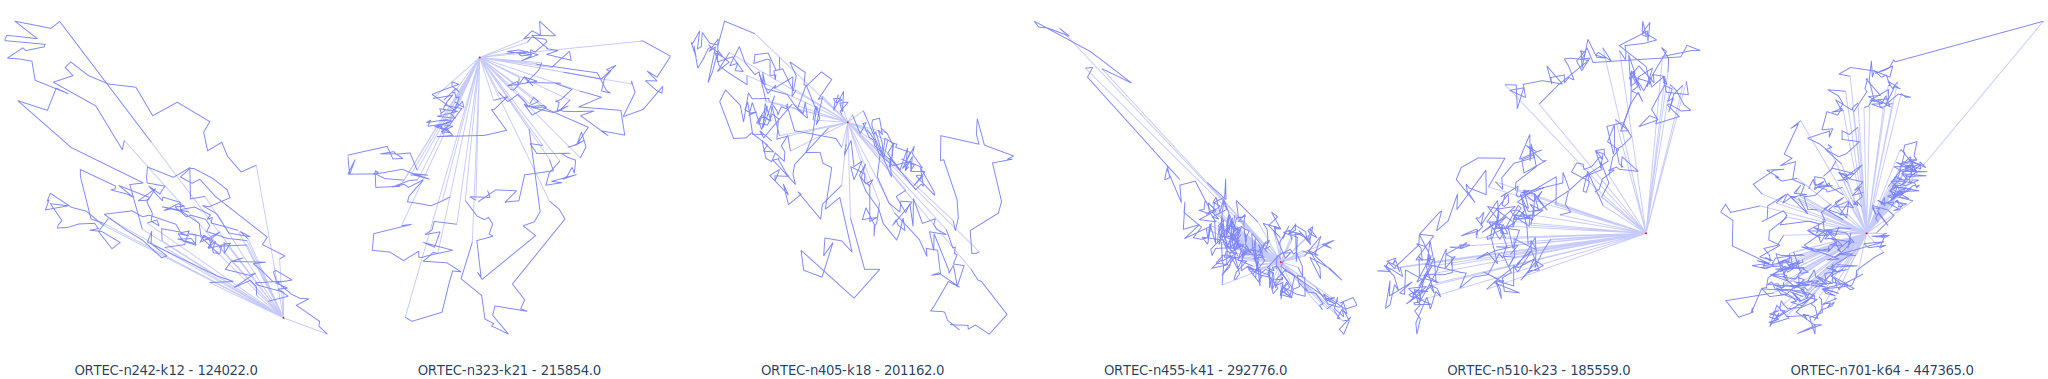

IRL_VNS2


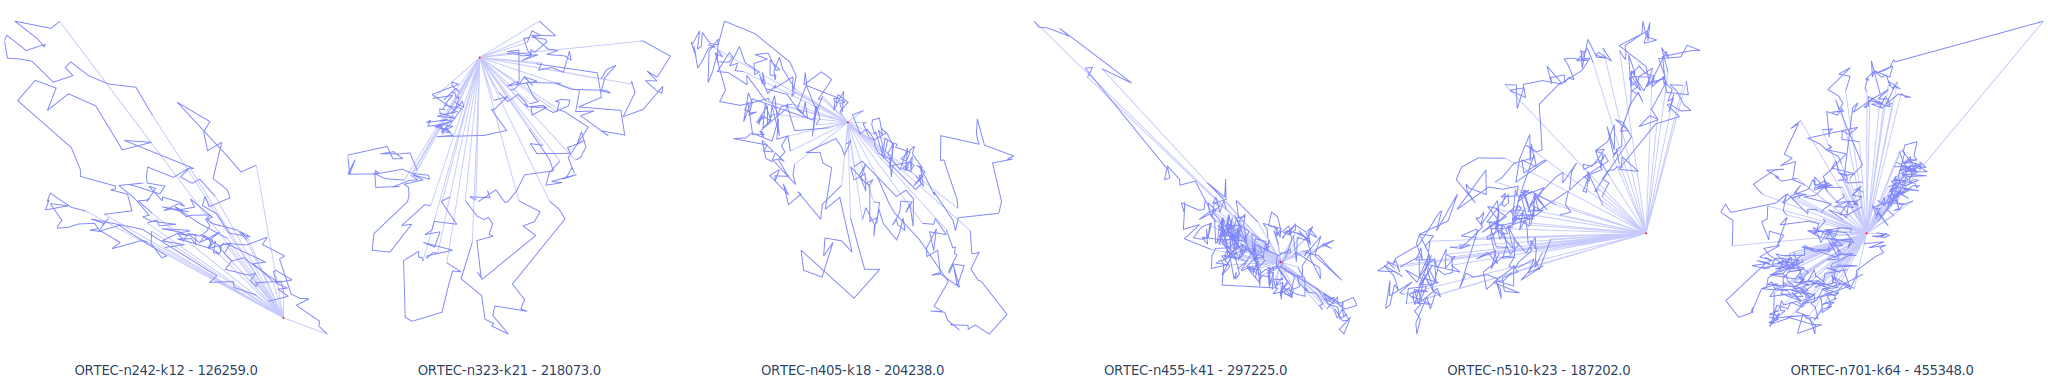

In [6]:
print("ORTEC instances:")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "ORTEC")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "ORTEC")

Loggi instances:
IRL_HGS2


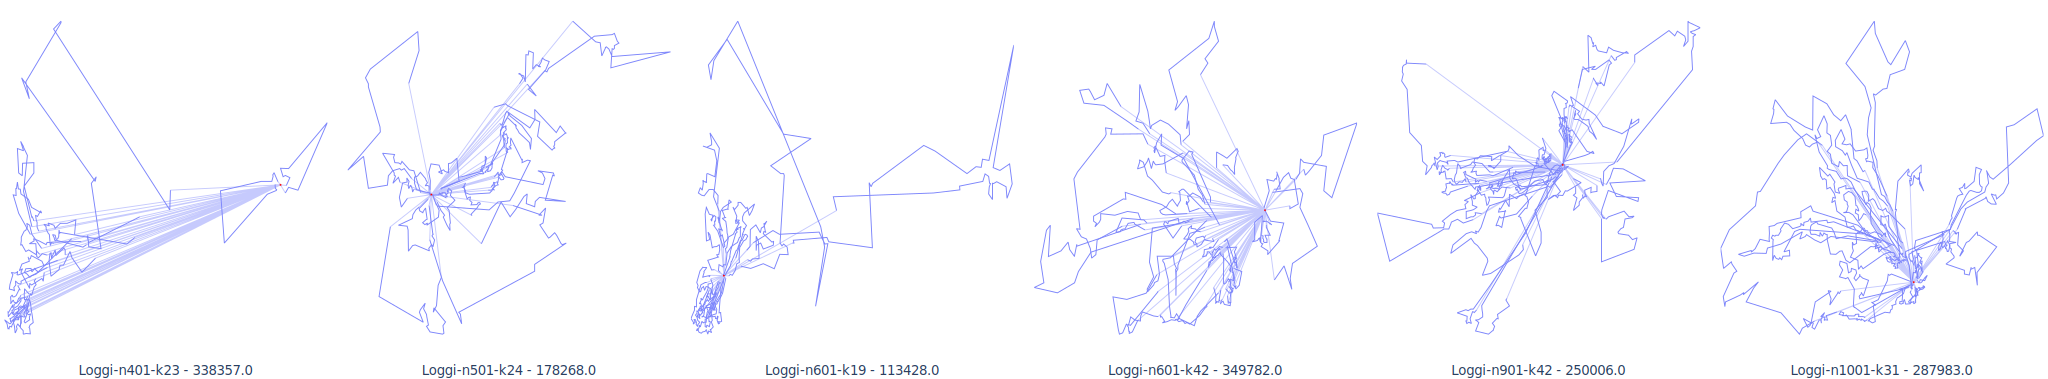

IRL_VNS2


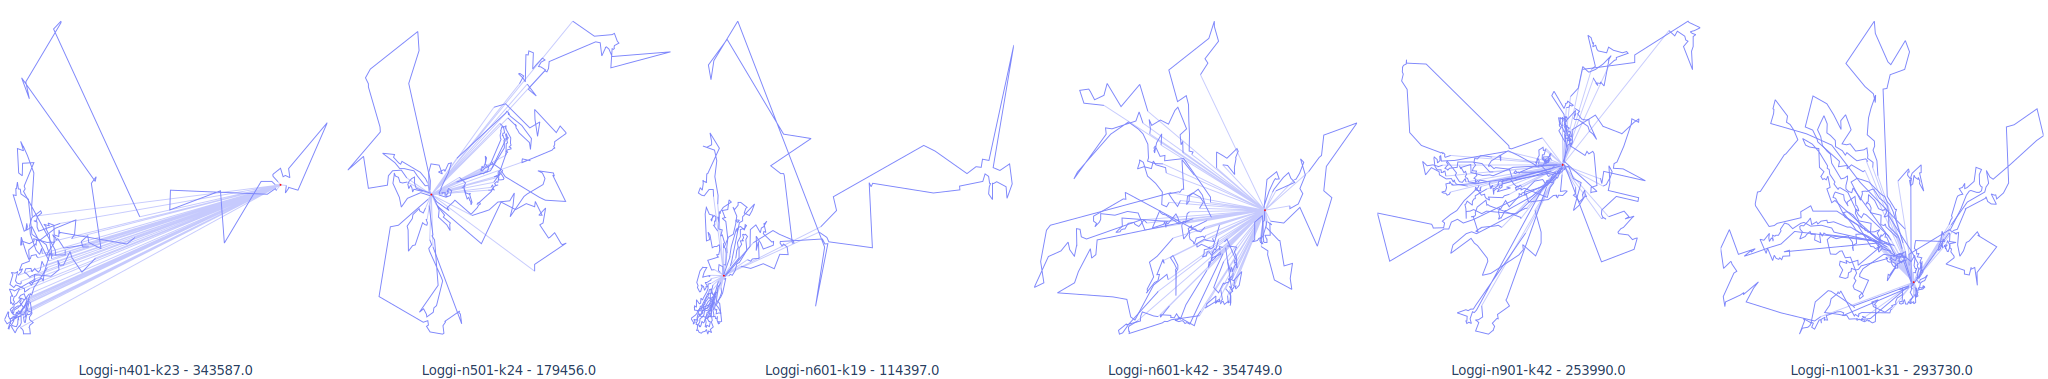

In [7]:
print("Loggi instances:")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "Loggi")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "Loggi")